In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Kerela_FINAL_new.csv')
# df = df.drop("Unnamed: 0", axis=1)

In [3]:
df = pd.read_csv('Kerela_FINAL_new.csv')
df.set_index('Date', inplace=True)

In [4]:
df.head()

,Tourists,Year,Month,No_of_flight_bookings,No_of_hotel_booked,Tourism,Tourism_Packages,Tourist_Places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min
Date,,,,,,,,,,,,,,,
2010-01-01,818356.0,2010,1,2991,2123306.250,86,82,24,51,78,0,35,6.8313,29.35,15.42
2010-02-01,721201.0,2010,2,2812,1861236.000,89,32,0,44,72,0,35,20.1979,31.79,16.11
2010-03-01,719944.0,2010,3,3136,1797776.875,100,100,33,47,66,0,90,66.8573,33.31,18.42
2010-04-01,735432.0,2010,4,2668,1787449.625,92,85,32,49,65,0,100,94.4786,33.71,20.62
2010-05-01,803431.0,2010,5,2518,1795854.375,100,29,18,54,64,0,56,112.6957,33.06,19.15


In [5]:
data = df.iloc[:].copy()  # Create a copy of the DataFrame

month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

data['Month'] = data['Month'].map(month_mapping)

In [64]:
data=df[:84]

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [66]:
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1), format='%Y%m')
data.set_index('Date', inplace=True)
# data.index.freq = 'M'  # Set the frequency to monthly

C:\Users\diksh\AppData\Local\Temp\ipykernel_10860\171001163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1), format='%Y%m')


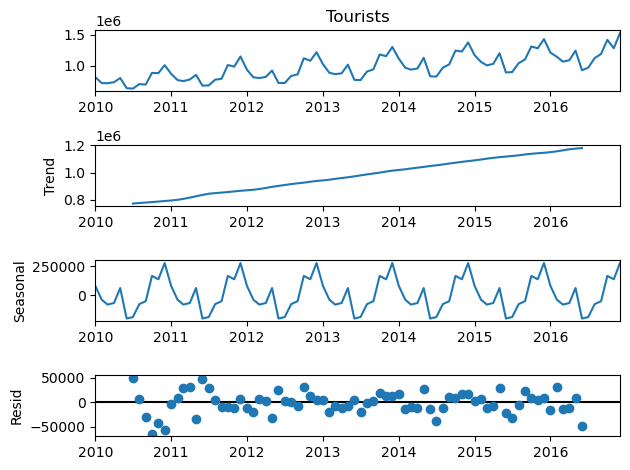

C:\Users\diksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\diksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2017-01-01    1.306207e+06
2017-02-01    1.244045e+06
2017-03-01    1.162427e+06
2017-04-01    1.186052e+06
2017-05-01    1.337633e+06
2017-06-01    1.021805e+06
2017-07-01    1.066739e+06
2017-08-01    1.221647e+06
2017-09-01    1.289690e+06
2017-10-01    1.519447e+06
2017-11-01    1.373177e+06
2017-12-01    1.626425e+06
2018-01-01    1.404413e+06
2018-02-01    1.342801e+06
2018-03-01    1.260887e+06
2018-04-01    1.284529e+06
2018-05-01    1.435919e+06
2018-06-01    1.120042e+06
2018-07-01    1.165330e+06
2018-08-01    1.320346e+06
2018-09-01    1.388454e+06
2018-10-01    1.618409e+06
2018-11-01    1.471053e+06
2018-12-01    1.725274e+06
Freq: MS, Name: predicted_mean, dtype: float64
            lower Tourists  upper Tourists
2017-01-01    1.257279e+06    1.355136e+06
2017-02-01    1.175609e+06    1.312480e+06
2017-03-01    1.078650e+06    1.246204e+06
2017-04-01    1.089441e+06    1.282662e+06
2017-05-01    1.229663e+06    1.445602e+06
2017-06-01    9.035797e+05    1.140031e+06
2017

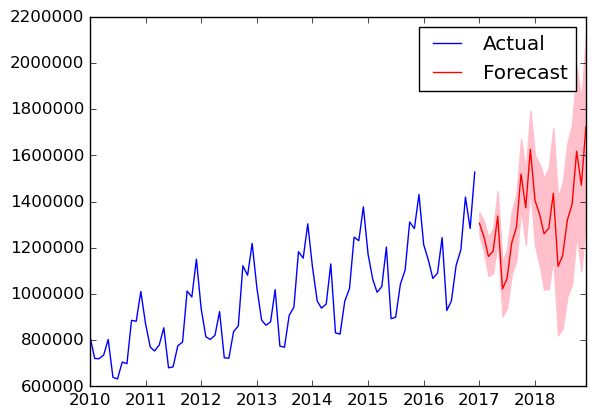

In [67]:
# Check for seasonality and trends using STL decomposition

result = sm.tsa.seasonal_decompose(data['Tourists'], model='additive')

# Plot the decomposition results
result.plot()
plt.show()

# Fit an ARIMA model
# You may need to adjust the order parameters (p, d, q) based on the results of decomposition
# and potentially try different seasonal orders (P, D, Q, and S)
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order
P = 1  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal moving average order
S = 12  # Seasonal period (assuming monthly data)

model = sm.tsa.SARIMAX(data['Tourists'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

# Make predictions for 2019
forecast = results.get_forecast(steps=24)  # Forecasting 12 months in 2019

# Print and plot the forecast
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

print(forecast_mean)
print(forecast_ci)

# Plot the forecasted values
# Plot the forecasted values
plt.figure()
plt.style.use('classic')  # Set the classic style for a white-themed plot
plt.plot(data['Tourists'], label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.legend()
plt.show()

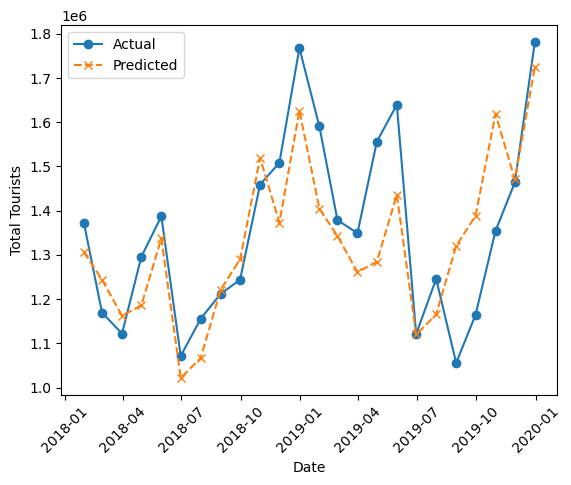

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_act and y_pred are defined
y_act = df.iloc[84:108]["Tourists"]
y_pred = forecast_mean

# Create a date range from January 2018 to December 2019
date_range = pd.date_range(start="2018-01-01", end="2019-12-31", freq="M")

# Use a white theme for the plot
plt.style.use('default')

# Create a plot to display both y_act and y_pred
plt.plot(date_range, y_act, label="Actual", marker='o', linestyle='-')
plt.plot(date_range, y_pred, label="Predicted", marker='x', linestyle='--')

# Label the axes
plt.xlabel("Date")
plt.ylabel("Total Tourists")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate between Actual and Predicted
plt.legend()

# Display the plot
plt.show()


In [105]:
y_act1=y_act[:]
y_pred1=y_pred[:]
y_pred1=y_pred1.reset_index(inplace=False)[:]
y_act1=y_act1.reset_index(inplace=False)[:]
y_pred2=y_pred1.iloc[:,1]
y_act2=y_act1.iloc[:,1]
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act2 - y_pred2))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act2 - y_pred2) ** 2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act2 - y_pred2) / y_act2)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 106445.63755783714
RMSE: 135297.6510249607
MAPE: 7.894788804863054


In [83]:
y_act1=y_act[:]
y_pred1=y_pred[:]

In [96]:
y_pred1=y_pred1.reset_index(inplace=False)[:]

In [97]:
y_pred2=y_pred1.iloc[:,1]

In [98]:
y_pred2

0     1.306207e+06
1     1.244045e+06
2     1.162427e+06
3     1.186052e+06
4     1.337633e+06
5     1.021805e+06
6     1.066739e+06
7     1.221647e+06
8     1.289690e+06
9     1.519447e+06
10    1.373177e+06
11    1.626425e+06
12    1.404413e+06
13    1.342801e+06
14    1.260887e+06
15    1.284529e+06
16    1.435919e+06
17    1.120042e+06
18    1.165330e+06
19    1.320346e+06
20    1.388454e+06
21    1.618409e+06
22    1.471053e+06
23    1.725274e+06
Name: predicted_mean, dtype: float64

In [101]:
import numpy as np
import pandas as pd

# Assuming you have y_act1 and y_pred1 defined somewhere

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_act2 - y_pred2))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((y_act2 - y_pred2) ** 2))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_act2 - y_pred2) / y_act1)) * 100

# Create a table
data = {'Metric': ['MAE', 'RMSE', 'MAPE'],
        'Value': [mae, rmse, mape]}

error_table = pd.DataFrame(data)

# Print the table
print(error_table)


  Metric          Value
0    MAE  106445.637558
1   RMSE  135297.651025
2   MAPE            NaN


In [37]:
y_act-y_pred

2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2018-01-01            NaN
2018-02-01            NaN
2018-03-01            NaN
2018-04-01            NaN
2018-05-01            NaN
2018-06-01            NaN
2018-07-01            NaN
2018-08-01            NaN
2018-09-01            NaN
2018-10-01            NaN
2018-11-01            NaN
2018-12-01            NaN
dtype: float64

In [38]:
y_pred

2018-01-01    1.609930e+06
2018-02-01    1.392545e+06
2018-03-01    1.341950e+06
2018-04-01    1.520921e+06
2018-05-01    1.603909e+06
2018-06-01    1.283600e+06
2018-07-01    1.366202e+06
2018-08-01    1.412306e+06
2018-09-01    1.437651e+06
2018-10-01    1.648649e+06
2018-11-01    1.709009e+06
2018-12-01    1.964720e+06
Freq: MS, Name: predicted_mean, dtype: float64